In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
#https://queirozf.com/entries/pandas-dataframe-groupby-examples#concatenate-strings-in-group
df = pd.DataFrame({
    'user_id':[1,2,1,3,3,],
    'content_id':[1,1,2,2,2,],
    'tag':['cool','nice','clever','clever','not-bad']
})
df

,user_id,content_id,tag
0,1,1,cool
1,2,1,nice
2,1,2,clever
3,3,2,clever
4,3,2,not-bad


In [7]:
#concat string in group
df.groupby('content_id')['tag'].apply(lambda x : ','.join(x))

content_id
1                cool,nice
2    clever,clever,not-bad
Name: tag, dtype: object

In [24]:
#Number of unique values per group
df.groupby('content_id')['user_id'].nunique().to_frame().rename(columns={'user_id':'User'})

,User
content_id,
1,2
2,2


In [33]:
#Sort groupby results
df = pd.DataFrame({
    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table']
})
df.groupby('product')['value'].sum().to_frame().reset_index().sort_values('value',ascending=False).rename(columns={'value':'Total_value'})

,product,Total_value
1,mobile phone,211.22
2,table,153.66
0,chair,55.01


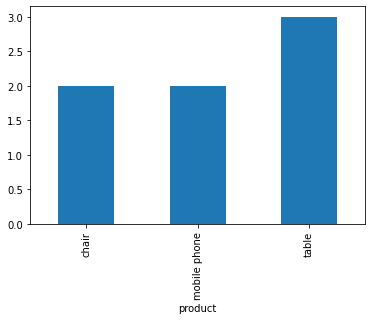

In [42]:
#GroupBy Plot Group Size
plt.clf()
df.groupby('product').size().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='product'>

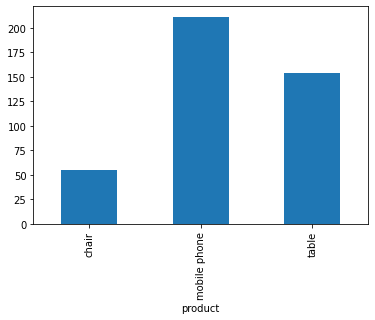

In [43]:
df.groupby('product')['value'].sum().plot(kind='bar')

In [45]:
#GroupBy Plot Mean with error bars
df.head()

,value,product
0,20.45,table
1,22.89,chair
2,32.12,chair
3,111.22,mobile phone
4,33.22,table


In [54]:
df_stats = df.groupby('product').agg([np.mean,np.std]).rename(columns={'value':'stats'})

<AxesSubplot:xlabel='product'>

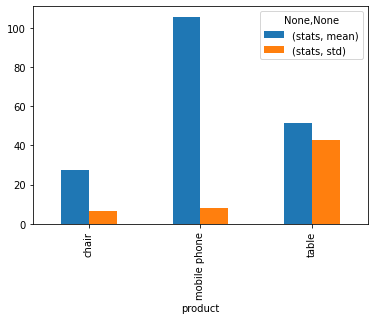

In [55]:
df_stats.plot(kind='bar')

In [72]:
for key,val in df.groupby('product'):
    print(val.loc[0:,'value'])

1    22.89
2    32.12
Name: value, dtype: float64
3    111.22
5    100.00
Name: value, dtype: float64
0    20.45
4    33.22
6    99.99
Name: value, dtype: float64
